### GW tutorial 2: Detector noise and GW150914

In [ ]:
# I used Chatgpt to create some of the comments

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [2]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [3]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [4]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)


**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [5]:
# Retrieve the duration of the data (in seconds)
d = data.duration

# Retrieve the sample rate (in Hz)
s_r = data.sample_rate

# Print the duration of the data
print(f'Duration is {d} s')

# Print the sample rate of the data
print(f'Data sample rate is {s_r} Hz')

# Print the total number of data points in the dataset
print(f'The total number of points is {len(data)}')

# Calculate the frequency resolution (Δf) as the inverse of the total duration
Df = 1 / d
print(f'The Delta_f is {Df} 1/s')

# Calculate the time step (Δt) as the inverse of the sample rate
Dt = 1 / s_r
print(f'The Delta_t is {Dt} s')  # Corrected unit to "s" (seconds)





Duration is 32.0 s
Data sample rate is 4096.0 Hz
The total number of points is 131072
The Delta_f is 0.03125 1/s
The Delta_t is 0.000244140625 s


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

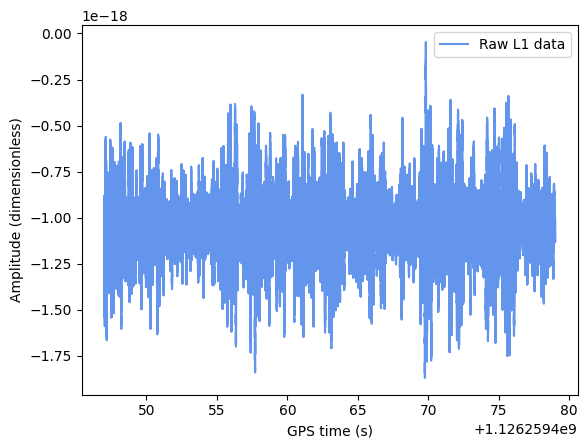

In [6]:
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

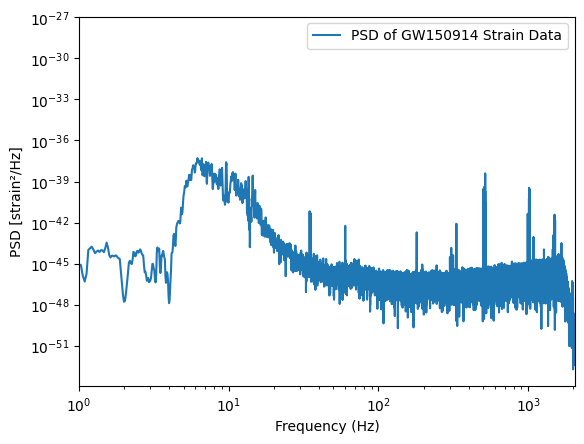

In [7]:
# Set the lower frequency bound (Hz)
flow = 1

# Compute the Power Spectral Density (PSD) of the data
# d = duration of the signal
# Df = frequency resolution (previously computed as 1/d)
# flow = lower frequency bound for filtering
psd = data.filter_psd(d, Df, flow)

# Plot the PSD using a log-log scale
plt.loglog(psd.get_sample_frequencies(), psd, label='PSD of GW150914 Strain Data')

# Set x-axis limits from the lower bound (flow) to the Nyquist frequency (sample_rate/2)
plt.xlim(flow, data.sample_rate / 2)

# Label the axes, add a legend to the plot, display the plot
plt.xlabel('Frequency (Hz)')  # Frequency domain representation
plt.ylabel('PSD [strain²/Hz]')  # Power Spectral Density unit
plt.legend()
plt.show()


The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


(1, 2048.0)

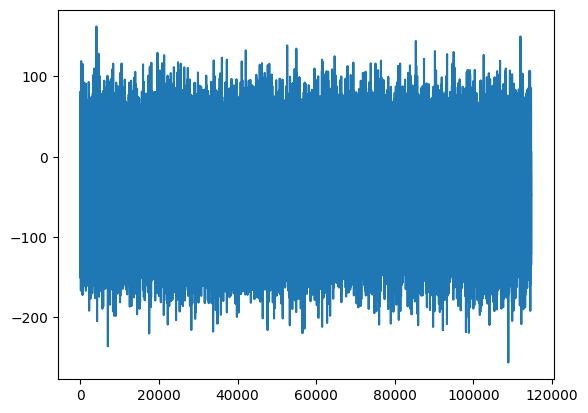

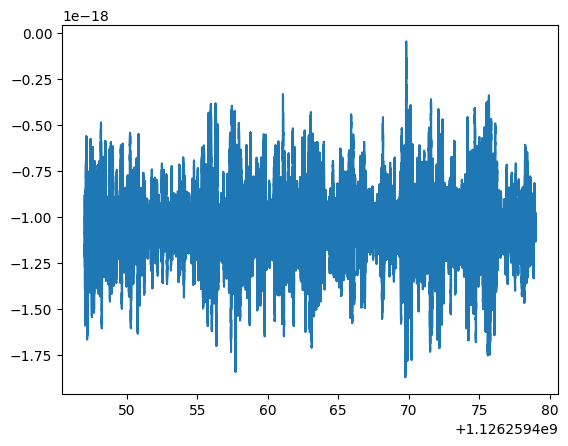

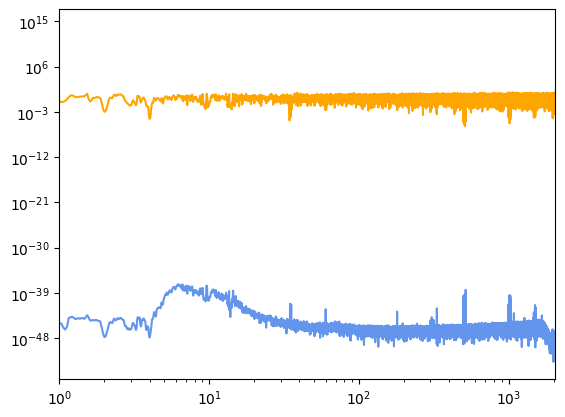

In [8]:
# Whiten the data with a time window of 4 seconds before and after each point
wh = data.whiten(4, 4)

# Create a new figure and plot the whitened data
plt.figure()
plt.plot(wh)  # The whitened strain data

# Create another figure and plot the original strain data over time
plt.figure()
plt.plot(data.sample_times, data)  # Plot original data against sample times

# Compute the Power Spectral Density (PSD) of the whitened data
psd_whitened = wh.filter_psd(wh.duration, wh.delta_f, flow=1)

# Create another figure for PSD comparison
plt.figure()

# Plot the original PSD (before whitening) in blue
plt.loglog(psd.get_sample_frequencies(), psd, label='PSD', color='cornflowerblue')

# Plot the whitened PSD in orange for comparison
plt.loglog(psd_whitened.get_sample_frequencies(), psd_whitened, color='orange')

# Set x-axis limits from flow to the Nyquist frequency (half of sample rate)
plt.xlim(flow, psd.sample_rate / 2)




Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

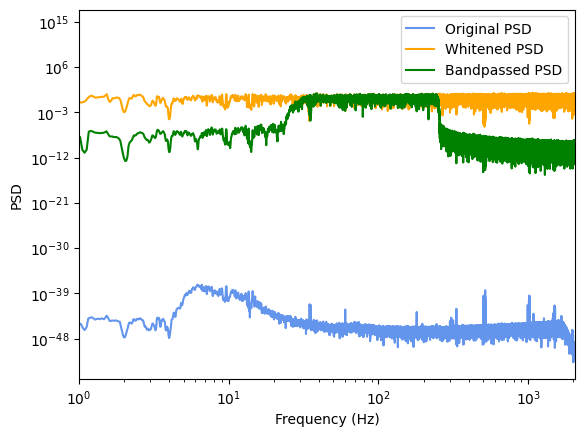

In [9]:
# Apply a high-pass FIR filter to remove low-frequency noise below 30 Hz
# The filter has a cutoff frequency of 30 Hz and a transition bandwidth of 512 Hz (as asked)
# beta=5.0 controls the filter's roll-off behavior, and corrupted edges are removed
high = wh.highpass_fir(30, 512, beta=5.0, remove_corrupted=True)

# Apply a low-pass FIR filter to remove high-frequency noise above 250 Hz
# This creates a bandpass filter (30 Hz – 250 Hz)
bandpassed = high.lowpass_fir(250, 512, beta=5.0, remove_corrupted=True)

# Compute the Power Spectral Density (PSD) of the bandpassed data
psd_bandpassed = bandpassed.filter_psd(bandpassed.duration, bandpassed.delta_f, flow=1)

# Create a new figure for PSD comparison
plt.figure()

# Plot the original PSD (before filtering) in blue
plt.loglog(psd.get_sample_frequencies(), psd, label='PSD', color='cornflowerblue')

# Plot the whitened PSD (before bandpass filtering) in orange
plt.loglog(psd_whitened.get_sample_frequencies(), psd_whitened, color='orange')

# Plot the bandpassed PSD (final filtered data) in green
plt.loglog(psd_bandpassed.get_sample_frequencies(), psd_bandpassed, color='green')

# Set x-axis limits from 1 Hz to Nyquist frequency (half of the sample rate)
plt.xlim(1, psd.sample_rate / 2)

# Label the axes
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

# Show the legend to differentiate plots
plt.legend(['Original PSD', 'Whitened PSD', 'Bandpassed PSD'])

# Display the plot
plt.show()





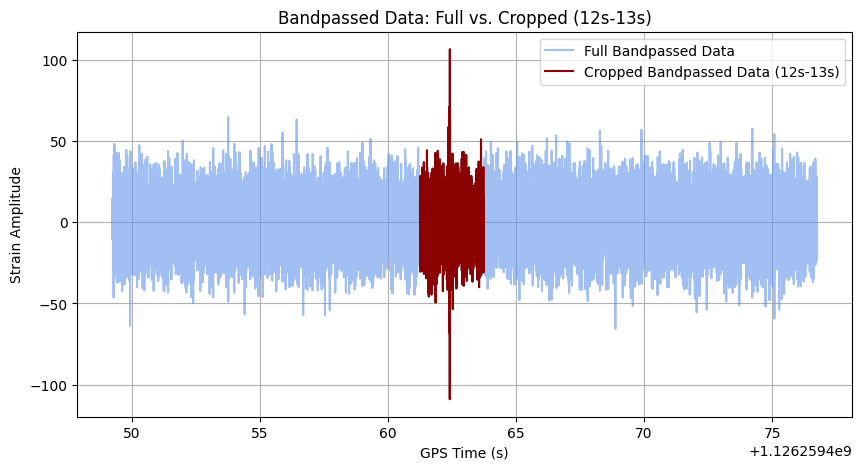

In [10]:
# Crop the bandpassed data
bandpassed_cropped = bandpassed.crop(12, 13)

# Plot both on the same figure
plt.figure(figsize=(10, 5))  # Set figure size

# Plot full bandpassed data
plt.plot(bandpassed.sample_times, bandpassed, label="Full Bandpassed Data", color="cornflowerblue", alpha=0.6)

# Plot cropped bandpassed data
plt.plot(bandpassed_cropped.sample_times, bandpassed_cropped, label="Cropped Bandpassed Data (12s-13s)", color="darkred")

# Labels and formatting (label axes, add a legend to the plot, display the plot)
plt.xlabel("GPS Time (s)")
plt.ylabel("Strain Amplitude")
plt.title("Bandpassed Data: Full vs. Cropped (12s-13s)")
plt.legend()
plt.grid()
plt.show()

**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

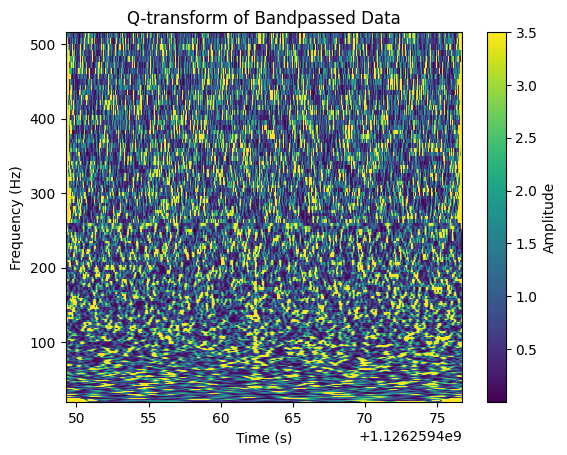

In [11]:
# Compute the Q-transform of the bandpassed data
# `delta_t=None`: Uses automatic time resolution
# `delta_f=None`: Uses automatic frequency resolution
# `logfsteps=200`: Number of frequency steps in a logarithmic scale
# `frange=(20, 512)`: Frequency range from 20 Hz to 512 Hz
# `qrange=(110, 110)`: Quality factor (Q) of 110
# `mismatch=0.2`: Controls how much overlap is allowed between windowed signals
# `return_complex=False`: Returns real-valued power instead of complex values
time, freq, qplane = bandpassed.qtransform(
    delta_t=None, delta_f=None, logfsteps=200,
    frange=(20, 512), qrange=(110, 110),
    mismatch=0.2, return_complex=False
)

# Create a time-frequency heatmap using pcolormesh
plt.pcolormesh(time, freq, qplane, vmax=3.5)

# Add labels for clarity
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Q-transform of Bandpassed Data')

# Display the plot
plt.colorbar(label='Amplitude')
plt.show()



As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


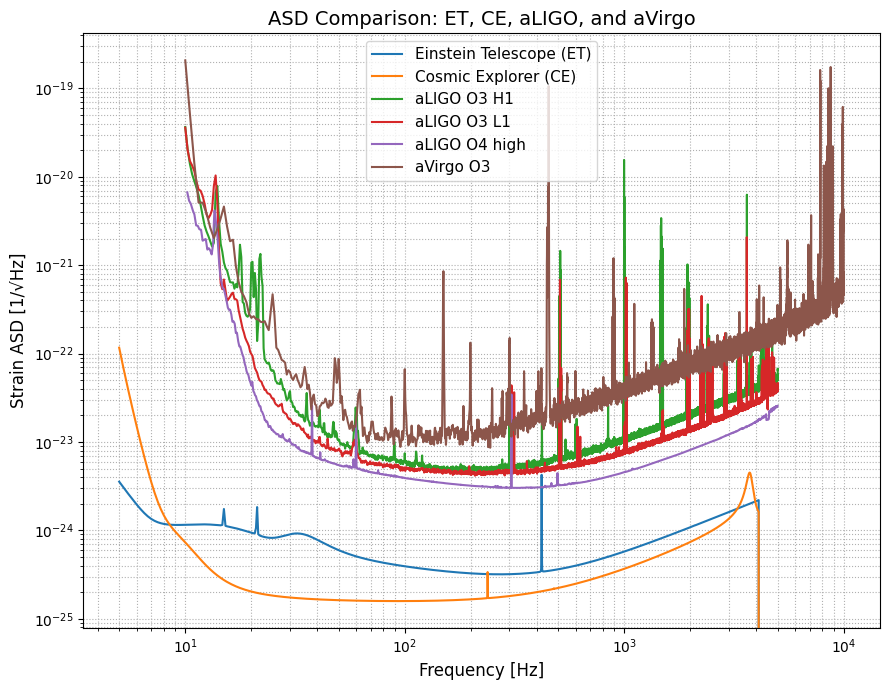

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.psd import analytical


# Define PSD parameters for ET & CE

length = 16384         # number of frequency bins
delta_f = 0.25         # frequency resolution [Hz]
low_freq_cutoff = 5.0  # below this, PSD is set to 0 by PyCBC


# Generate ET & CE PSDs (units: strain^2/Hz) and convert to ASD
psd_et = analytical.EinsteinTelescopeP1600143(length, delta_f, low_freq_cutoff)
psd_ce = analytical.CosmicExplorerP1600143(length, delta_f, low_freq_cutoff)

asd_et = np.sqrt(psd_et)
asd_ce = np.sqrt(psd_ce)

# Create frequency array; we only plot above low_freq_cutoff
freqs = np.arange(0, length) * delta_f
valid = freqs >= low_freq_cutoff

# Load external sensitivity curves (ASD vs frequency)
# Files have two columns:
#   frequency(Hz)   ASD [strain / sqrt(Hz)]

file_aligo_O3H1   = 'sensitivity_curves/aligo_O3actual_H1.txt'
file_aligo_O3L1   = 'sensitivity_curves/aligo_O3actual_L1.txt'
file_aligo_O4high = 'sensitivity_curves/aligo_O4high.txt'
file_avirgo_O3    = 'sensitivity_curves/avirgo_O3actual.txt'

# Load them. If file formats differ, adjust accordingly (skiprows, columns).
freq_aligo_O3H1, asd_aligo_O3H1     = np.loadtxt(file_aligo_O3H1, unpack=True)
freq_aligo_O3L1, asd_aligo_O3L1     = np.loadtxt(file_aligo_O3L1, unpack=True)
freq_aligo_O4high, asd_aligo_O4high = np.loadtxt(file_aligo_O4high, unpack=True)
freq_avirgo_O3, asd_avirgo_O3       = np.loadtxt(file_avirgo_O3, unpack=True)


# Plot all ASDs on the same log-log figure
plt.figure(figsize=(9, 7))

# ET & CE (from PyCBC)
plt.loglog(freqs[valid], asd_et[valid], label='Einstein Telescope (ET)')
plt.loglog(freqs[valid], asd_ce[valid], label='Cosmic Explorer (CE)')

# aLIGO O3 (H1 & L1), aLIGO O4 high, aVirgo O3
plt.loglog(freq_aligo_O3H1, asd_aligo_O3H1, label='aLIGO O3 H1')
plt.loglog(freq_aligo_O3L1, asd_aligo_O3L1, label='aLIGO O3 L1')
plt.loglog(freq_aligo_O4high, asd_aligo_O4high, label='aLIGO O4 high')
plt.loglog(freq_avirgo_O3, asd_avirgo_O3, label='aVirgo O3')

# Labels, titles, legend etc. and plot
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('Strain ASD [1/√Hz]', fontsize=12)
plt.title('ASD Comparison: ET, CE, aLIGO, and aVirgo', fontsize=14)
plt.grid(True, which='both', ls=':')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


Good job! This is the end of the second part. Maybe you can go for a break?

In [ ]:
#       B)